In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress as linreg

In [2]:
# Generate Latitudes and Longitudes
lats = np.random.uniform(-90,90,1500)
lngs = np.random.uniform(-180,180,1500)
lats_lngs = zip(lats,lngs)
lats_lngs

In [3]:
coordinates = list(lats_lngs)
coordinates

[(54.861910091539045, -100.82736453806092),
 (-8.764125635607215, 74.96388610775085),
 (-53.96434711019594, 40.894994812614954),
 (-88.54488576525749, -107.13535373063365),
 (72.7850873774299, 172.85291810916465),
 (30.864349147408277, 138.4890061096081),
 (21.9849875361313, 136.83740372859836),
 (79.74186150222968, -42.70603902594962),
 (13.057293976784038, 126.11837041308144),
 (-58.229725407066894, -179.63130704582923),
 (40.16272797677385, 60.15481101221803),
 (61.27425186026514, -61.01098383196643),
 (86.93495155031792, 142.31306265407346),
 (89.33924564977696, 138.7616528810051),
 (-80.99588850536287, -179.72571256096424),
 (-27.035900593769796, 27.99124973073458),
 (54.686606402752375, -11.943655336296416),
 (62.59057043183671, -42.33399284552351),
 (-63.973135043273956, 144.51807601941817),
 (-32.54448748132886, 166.2278362928579),
 (51.698346414841836, -154.8213682897494),
 (59.570795195533975, -148.68741441657824),
 (51.1116083915463, 140.28692103141918),
 (-67.91388510709993

In [4]:
# Create City list
city_list = []
for i in coordinates:
    x = citipy.nearest_city(i[0],i[1]).city_name
    if x not in city_list:
        city_list.append(x)

In [5]:
len(city_list)

610

In [6]:
city_data = []
set_num = 1
record_num = 1

# Print the beginning of the logging.
print("-----------------------------")
print("Beginning Data Retrieval     ")
print("-----------------------------")

for i in range(0,len(city_list)):
    if (i%50 == 0 and i>=50):
        set_num +=1
        record_num = 1
    x = city_list[i]
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key + "&q=" + x.replace(" ","+")
    weather_response = requests.get(url)
    try:
        weather_json = weather_response.json()
        city_data.append({
                        'City' : weather_json['name'], 
                        'Country' : weather_json['sys']['country'],
                        'Date' : datetime.utcfromtimestamp(weather_json['dt']).strftime('%Y-%m-%d %H:%M:%S'),
                        'Lat' : weather_json['coord']['lat'],
                        'Lon' : weather_json['coord']['lon'],
                        'Max Temp' : weather_json['main']['temp_max'],
                        'Humidity' : weather_json['main']['humidity'],
                        'Cloudiness' : weather_json['clouds']['all'],
                        'Wind Speed' : weather_json['wind']['speed']
                        })
        print(f"Processed record {record_num} of set {set_num} | {x}")
        record_num += 1
    except:
        print(f"{x} not found! Skipping..")

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval     
-----------------------------
Processed record 1 of set 1 | flin flon
Processed record 2 of set 1 | hithadhoo
Processed record 3 of set 1 | east london
Processed record 4 of set 1 | punta arenas
Processed record 5 of set 1 | komsomolskiy
Processed record 6 of set 1 | oyama
Processed record 7 of set 1 | naze
Processed record 8 of set 1 | ilulissat
Processed record 9 of set 1 | anito
Processed record 10 of set 1 | vaini
Processed record 11 of set 1 | hazorasp
Processed record 12 of set 1 | pangnirtung
nizhneyansk not found! Skipping..
Processed record 13 of set 1 | deneysville
Processed record 14 of set 1 | westport
Processed record 15 of set 1 | nanortalik
Processed record 16 of set 1 | hobart
Processed record 17 of set 1 | ahipara
Processed record 18 of set 1 | kodiak
Processed record 19 of set 1 | anchorage
Processed record 20 of set 1 | de-kastri
Processed record 21 of set 1 | cape town
Processed record 22 of set 1 | rikitea

Processed record 5 of set 5 | lawrenceburg
Processed record 6 of set 5 | san cristobal
Processed record 7 of set 5 | searcy
Processed record 8 of set 5 | luderitz
Processed record 9 of set 5 | sobolevo
Processed record 10 of set 5 | zeya
Processed record 11 of set 5 | kruisfontein
Processed record 12 of set 5 | hasaki
Processed record 13 of set 5 | papara
Processed record 14 of set 5 | tobermory
Processed record 15 of set 5 | klaksvik
Processed record 16 of set 5 | alberton
Processed record 17 of set 5 | sibolga
Processed record 18 of set 5 | ko samui
chengmai not found! Skipping..
Processed record 19 of set 5 | trinidad
Processed record 20 of set 5 | hofn
Processed record 21 of set 5 | jacareacanga
Processed record 22 of set 5 | ardabil
Processed record 23 of set 5 | saint-gabriel
Processed record 24 of set 5 | lata
Processed record 25 of set 5 | savannah bight
Processed record 26 of set 5 | egvekinot
Processed record 27 of set 5 | teya
bargal not found! Skipping..
Processed record 28

Processed record 12 of set 9 | clyde river
Processed record 13 of set 9 | zhytomyr
Processed record 14 of set 9 | pontian kecil
Processed record 15 of set 9 | nantucket
Processed record 16 of set 9 | sovetskiy
Processed record 17 of set 9 | bandarbeyla
Processed record 18 of set 9 | los llanos de aridane
Processed record 19 of set 9 | sakaiminato
Processed record 20 of set 9 | mandla
Processed record 21 of set 9 | kalmunai
Processed record 22 of set 9 | awjilah
choucheng not found! Skipping..
Processed record 23 of set 9 | tabuk
Processed record 24 of set 9 | mazagao
Processed record 25 of set 9 | takoradi
Processed record 26 of set 9 | vung tau
Processed record 27 of set 9 | takaka
Processed record 28 of set 9 | malakal
Processed record 29 of set 9 | outjo
Processed record 30 of set 9 | kurilsk
Processed record 31 of set 9 | hay river
toftir not found! Skipping..
Processed record 32 of set 9 | mehamn
Processed record 33 of set 9 | malartic
Processed record 34 of set 9 | beinamar
Proce

In [7]:
weather_df = pd.DataFrame(city_data)

In [8]:
weather_df = weather_df.reset_index().drop(columns = ['index'])
weather_df

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,Flin Flon,CA,2021-04-01 17:59:19,54.7682,-101.8650,39.20,60,90,8.05
1,Hithadhoo,MV,2021-04-01 17:59:19,-0.6000,73.0833,83.77,76,85,16.96
2,East London,ZA,2021-04-01 17:57:40,-33.0153,27.9116,66.20,77,75,6.91
3,Punta Arenas,CL,2021-04-01 17:58:08,-53.1500,-70.9167,51.80,76,0,11.50
4,Yangi Marg`ilon,UZ,2021-04-01 17:59:19,40.4272,71.7189,39.20,56,11,9.22
...,...,...,...,...,...,...,...,...,...
553,Soe,ID,2021-04-01 18:02:29,-9.8607,124.2840,66.78,97,100,2.21
554,Mabaruma,GY,2021-04-01 18:02:30,8.2000,-59.7833,84.88,51,100,7.47
555,Karpogory,RU,2021-04-01 18:02:31,64.0019,44.4451,28.09,96,95,4.76
556,Pemangkat,ID,2021-04-01 18:02:31,1.1667,108.9667,79.50,79,98,1.77


In [9]:
output_file_path = "../Resources/cities_weather_data.csv"
weather_df.to_csv(output_file_path,index_label="City_ID")

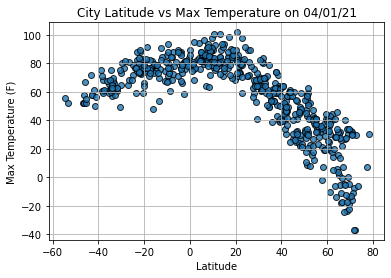

In [10]:
# Latitude vs Max Temperature
plt.scatter(
    x = weather_df['Lat'],
    y = weather_df['Max Temp'],
    alpha = 0.8,
    edgecolor = 'black',
    linewidths = 1
)
plt.title('City Latitude vs Max Temperature on ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('../Resources/Fig1.png')

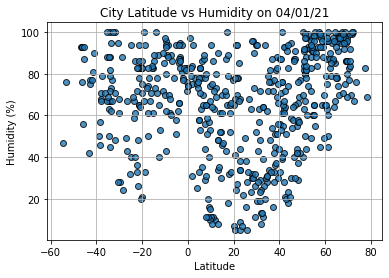

In [11]:
# Latitude vs Humidity
plt.scatter(
    x = weather_df['Lat'],
    y = weather_df['Humidity'],
    alpha = 0.8,
    edgecolor = 'black',
    linewidths = 1
)
plt.title('City Latitude vs Humidity on ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('../Resources/Fig2.png')

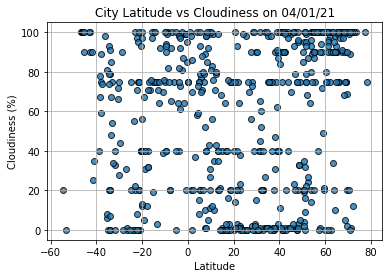

In [12]:
# Latitude vs Cloudiness
plt.scatter(
    x = weather_df['Lat'],
    y = weather_df['Cloudiness'],
    alpha = 0.8,
    edgecolor = 'black',
    linewidths = 1
)
plt.title('City Latitude vs Cloudiness on ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('../Resources/Fig3.png')

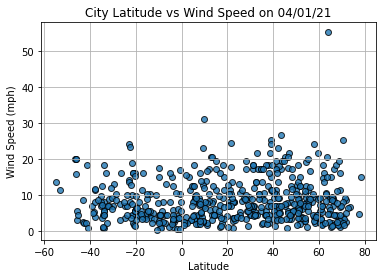

In [13]:
# Latitude vs Wind Speed
plt.scatter(
    x = weather_df['Lat'],
    y = weather_df['Wind Speed'],
    alpha = 0.8,
    edgecolor = 'black',
    linewidths = 1
)
plt.title('City Latitude vs Wind Speed on ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('../Resources/Fig4.png')

In [136]:
# Split DataFrame into Northern and Southern Hemispheres
north_weather_df = weather_df.loc[weather_df['Lat']>0]
south_weather_df = weather_df.loc[weather_df['Lat']<0]

# Linear Regression Plot Function
def plot_linear_regression(xaxis, yaxis, regvals, annotate_eqn, annotate_pstn, ylabel, title):
    plt.scatter(
        xaxis,
        yaxis
        )
    plt.plot(
        xaxis,
        regvals,
        color = 'red'
    )
    plt.annotate(
        annotate_eqn,
        annotate_pstn,
        color = 'red',
        fontsize = 18
    )
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)

(-0.8788968620048963, 1.0003420919352965e-128)

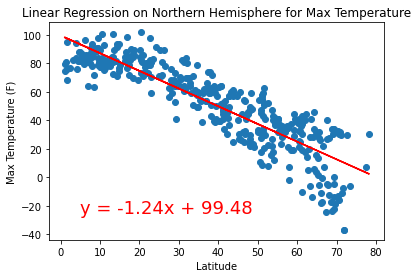

In [154]:
# Linear Regression - Latitude vs Temp (Northern Hemisphere)
(slope,intercept,rval,pval,stderr) = linreg(north_weather_df['Lat'],north_weather_df['Max Temp'])
linreg_eqn = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
linreg_vals = [ slope*i + intercept for i in north_weather_df['Lat']]
plot_linear_regression(
                north_weather_df['Lat'],
                north_weather_df['Max Temp'],
                linreg_vals,
                linreg_eqn,
                (5,-25),
                'Max Temperature (F)',
                'Linear Regression on Northern Hemisphere for Max Temperature'
)
rval,pval

(0.6496518164390191, 8.595991728655066e-21)

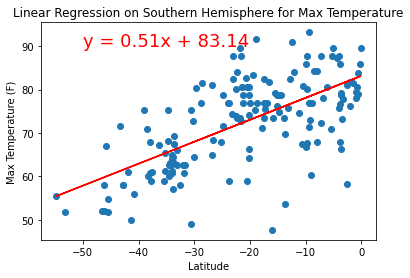

In [155]:
# Linear Regression - Latitude vs Temp (Southern Hemisphere)
(slope,intercept,rval,pval,stderr) = linreg(south_weather_df['Lat'],south_weather_df['Max Temp'])
linreg_eqn = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
linreg_vals = [ slope*i + intercept for i in south_weather_df['Lat']]
plot_linear_regression(
                south_weather_df['Lat'],
                south_weather_df['Max Temp'],
                linreg_vals,
                linreg_eqn,
                (-50,90),
                'Max Temperature (F)',
                'Linear Regression on Southern Hemisphere for Max Temperature'
)
rval,pval

(0.4295776812974873, 3.2568439750973807e-19)

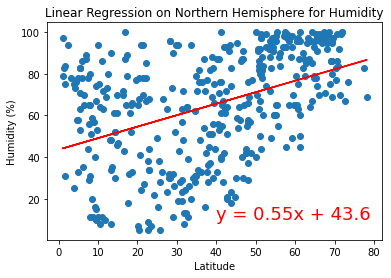

In [153]:
# Linear Regression - Latitude vs Humidity (Northern Hemisphere)
(slope,intercept,rval,pval,stderr) = linreg(north_weather_df['Lat'],north_weather_df['Humidity'])
linreg_eqn = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
linreg_vals = [ slope*i + intercept for i in north_weather_df['Lat']]
plot_linear_regression(
                north_weather_df['Lat'],
                north_weather_df['Humidity'],
                linreg_vals,
                linreg_eqn,
                (40,10),
                'Humidity (%)',
                'Linear Regression on Northern Hemisphere for Humidity'
)
rval,pval

(0.6496518164390191, 8.595991728655066e-21)

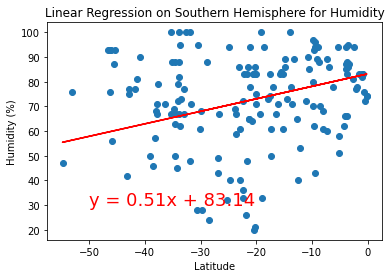

In [152]:
# Linear Regression - Latitude vs Humidity (Southern Hemisphere)
(slope,intercept,rval,pval,stderr) = linreg(south_weather_df['Lat'],south_weather_df['Max Temp'])
linreg_eqn = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
linreg_vals = [ slope*i + intercept for i in south_weather_df['Lat']]
plot_linear_regression(
                south_weather_df['Lat'],
                south_weather_df['Humidity'],
                linreg_vals,
                linreg_eqn,
                (-50,30),
                'Humidity (%)',
                'Linear Regression on Southern Hemisphere for Humidity'
)
rval,pval

(0.2699086528960649, 4.877538101084612e-08)

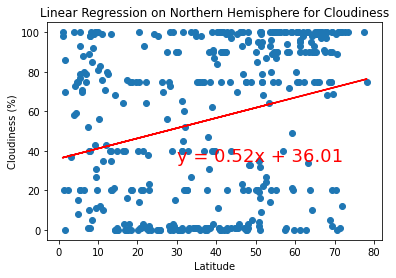

In [151]:
# Linear Regression - Latitude vs Cloudiness (Northern Hemisphere)
(slope,intercept,rval,pval,stderr) = linreg(north_weather_df['Lat'],north_weather_df['Cloudiness'])
linreg_eqn = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
linreg_vals = [ slope*i + intercept for i in north_weather_df['Lat']]
plot_linear_regression(
                north_weather_df['Lat'],
                north_weather_df['Cloudiness'],
                linreg_vals,
                linreg_eqn,
                (30,35),
                'Cloudiness (%)',
                'Linear Regression on Northern Hemisphere for Cloudiness'
)
rval,pval

(0.17446496932206199, 0.026388976202162847)

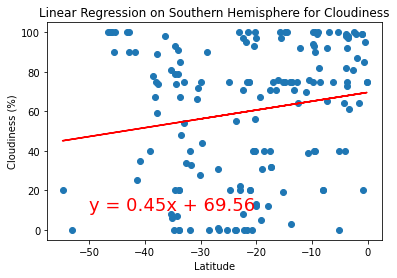

In [150]:
# Linear Regression - Latitude vs Cloudiness (Southern Hemisphere)
(slope,intercept,rval,pval,stderr) = linreg(south_weather_df['Lat'],south_weather_df['Cloudiness'])
linreg_eqn = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
linreg_vals = [ slope*i + intercept for i in south_weather_df['Lat']]
plot_linear_regression(
                south_weather_df['Lat'],
                south_weather_df['Cloudiness'],
                linreg_vals,
                linreg_eqn,
                (-50,10),
                'Cloudiness (%)',
                'Linear Regression on Southern Hemisphere for Cloudiness'
)
rval,pval

(0.005214323699489745, 0.9176166074945056)

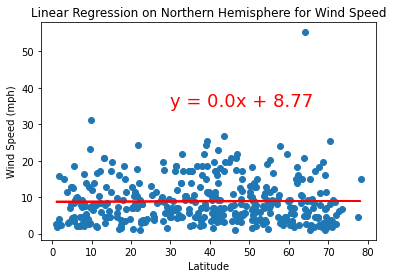

In [149]:
# Linear Regression - Latitude vs Wind Speed (Northern Hemisphere)
(slope,intercept,rval,pval,stderr) = linreg(north_weather_df['Lat'],north_weather_df['Wind Speed'])
linreg_eqn = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
linreg_vals = [ slope*i + intercept for i in north_weather_df['Lat']]
plot_linear_regression(
                north_weather_df['Lat'],
                north_weather_df['Wind Speed'],
                linreg_vals,
                linreg_eqn,
                (30,35),
                'Wind Speed (mph)',
                'Linear Regression on Northern Hemisphere for Wind Speed'
)
rval,pval

(-0.22575957503574673, 0.0038697646590539116)

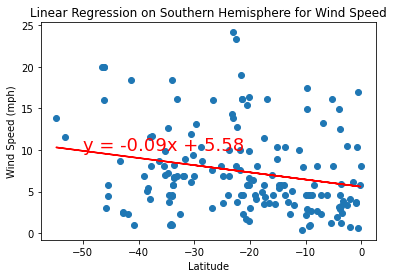

In [156]:
# Linear Regression - Latitude vs Cloudiness (Southern Hemisphere)
(slope,intercept,rval,pval,stderr) = linreg(south_weather_df['Lat'],south_weather_df['Wind Speed'])
linreg_eqn = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
linreg_vals = [ slope*i + intercept for i in south_weather_df['Lat']]
plot_linear_regression(
                south_weather_df['Lat'],
                south_weather_df['Wind Speed'],
                linreg_vals,
                linreg_eqn,
                (-50,10),
                'Wind Speed (mph)',
                'Linear Regression on Southern Hemisphere for Wind Speed'
)
rval,pval